In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

In [2]:
data_path = r"C:\Users\acer\Documents\Python Projects\Fitness Trackers Products Ecommerce\smartwatches.csv"
df = pd.read_csv(data_path)
df.drop_duplicates(inplace=True)
train_df = df.sample(frac=0.8,random_state=42)
test_df  = df.drop(train_df.index)
train_df = train_df.reset_index()
test_df  = test_df.reset_index()



In [3]:
df.shape , train_df.shape , test_df.shape

((450, 16), (360, 17), (90, 17))

In [4]:
train_df.head()

,index,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,407,407,zebronics,2949.0,4199.0,29.768993,3.1,10.0,LEATHER fit-650,Oval,Black,Leather,Yes,NaN,Yes,2.7 inches,NaN
1,444,444,fire-boltt,6999.0,15999.0,56.253516,2.6,NaN,bsw020,Circle,Brown,Silicon,Yes,8.0,Yes,1.4 inches,NaN
2,117,117,fire-boltt,2499.0,11999.0,79.173264,4.1,1990.0,BSW070,NaN,NaN,NaN,Yes,8.0,Yes,1.9 inches,75g +
3,30,30,boat,1999.0,7990.0,74.981227,3.6,827.0,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,75g +
4,415,415,fire-boltt,2299.0,5999.0,61.676946,2.5,24.0,NINJA PRO MAX,Square,Blue,Silicon,Yes,22.0,Yes,1.6 inches,NaN


In [5]:
train_df.drop(['index','Unnamed: 0'], axis=1 , inplace=True)

In [6]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,zebronics,2949.0,4199.0,29.768993,3.1,10.0,LEATHER fit-650,Oval,Black,Leather,Yes,NaN,Yes,2.7 inches,NaN
1,fire-boltt,6999.0,15999.0,56.253516,2.6,NaN,bsw020,Circle,Brown,Silicon,Yes,8.0,Yes,1.4 inches,NaN
2,fire-boltt,2499.0,11999.0,79.173264,4.1,1990.0,BSW070,NaN,NaN,NaN,Yes,8.0,Yes,1.9 inches,75g +
3,boat,1999.0,7990.0,74.981227,3.6,827.0,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,75g +
4,fire-boltt,2299.0,5999.0,61.676946,2.5,24.0,NINJA PRO MAX,Square,Blue,Silicon,Yes,22.0,Yes,1.6 inches,NaN


In [7]:
train_df['Display Size'].isna().sum()

27

In [8]:
train_df['Display Size'].value_counts().count()

34

In [9]:
train_df['Display Size'].fillna('0.0 inches', inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_2772\2982374164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].fillna('0.0 inches', inplace=True)


In [10]:
train_df['Display Size'].isna().sum()

0

In [11]:
float('0.0 inches'.split()[0])

0.0

In [12]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [13]:
train_df['Display Size'].head()

0    2.7
1    1.4
2    1.9
3    0.0
4    1.6
Name: Display Size, dtype: float64

In [14]:
train_df['Display Size'].replace(0.0,np.nan,inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_2772\759104598.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].replace(0.0,np.nan,inplace=True)


In [15]:
train_df['Display Size'].isna().sum()

28

In [16]:
train_df['Weight'].isna().sum()

149

In [17]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    63
75g +        58
35 - 50 g    45
<= 20 g      30
50 - 75 g    15
Name: count, dtype: int64

In [18]:
re.findall('\d+','20 - 35 g')

['20', '35']

In [19]:
cal = sum([int(x) for x in re.findall('\d+','20 - 35 g')])/2
train_df['Weight'].replace('20 - 35 g',cal,inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_2772\1488152250.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('20 - 35 g',cal,inplace=True)


In [20]:
cal = sum([int(x) for x in re.findall('\d+','35 - 50 g')])/2
train_df['Weight'].replace('35 - 50 g',cal,inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_2772\784690501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('35 - 50 g',cal,inplace=True)


In [21]:
cal = sum([int(x) for x in re.findall('\d+','50 - 75 g')])/2
train_df['Weight'].replace('50 - 75 g',cal,inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_2772\541551057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('50 - 75 g',cal,inplace=True)


In [22]:
train_df['Weight'].replace('75g +',float(re.findall('\d+','75g +')[0]),inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_2772\3003243348.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('75g +',float(re.findall('\d+','75g +')[0]),inplace=True)


In [23]:
train_df['Weight'].replace('<= 20 g',float(re.findall('\d+','<= 20 g')[0]),inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_2772\3242668750.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('<= 20 g',float(re.findall('\d+','<= 20 g')[0]),inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_2772\3242668750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [24]:
train_df['Weight'].value_counts()

Weight
27.5    63
75.0    58
42.5    45
20.0    30
62.5    15
Name: count, dtype: int64

In [25]:
train_df['Discount Price'] = (train_df['Original Price'] * (-train_df['Discount Percentage']))/100

In [26]:
train_df.drop(['Discount Percentage'],axis = 1, inplace=True)

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                360 non-null    object 
 1   Current Price        354 non-null    float64
 2   Original Price       304 non-null    float64
 3   Rating               356 non-null    float64
 4   Number OF Ratings    315 non-null    float64
 5   Model Name           330 non-null    object 
 6   Dial Shape           260 non-null    object 
 7   Strap Color          260 non-null    object 
 8   Strap Material       304 non-null    object 
 9   Touchscreen          329 non-null    object 
 10  Battery Life (Days)  330 non-null    float64
 11  Bluetooth            355 non-null    object 
 12  Display Size         332 non-null    float64
 13  Weight               211 non-null    float64
 14  Discount Price       304 non-null    float64
dtypes: float64(8), object(7)
memory usage: 4

### Numerical Data

In [28]:
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype =='float64']

In [29]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [30]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,2949.0,4199.0,3.1,10.0,NaN,2.7,NaN,-1250.000000
1,6999.0,15999.0,2.6,NaN,8.0,1.4,NaN,-8999.999999
2,2499.0,11999.0,4.1,1990.0,8.0,1.9,75.0,-9500.000000
3,1999.0,7990.0,3.6,827.0,8.0,NaN,75.0,-5991.000000
4,2299.0,5999.0,2.5,24.0,22.0,1.6,NaN,-3700.000000


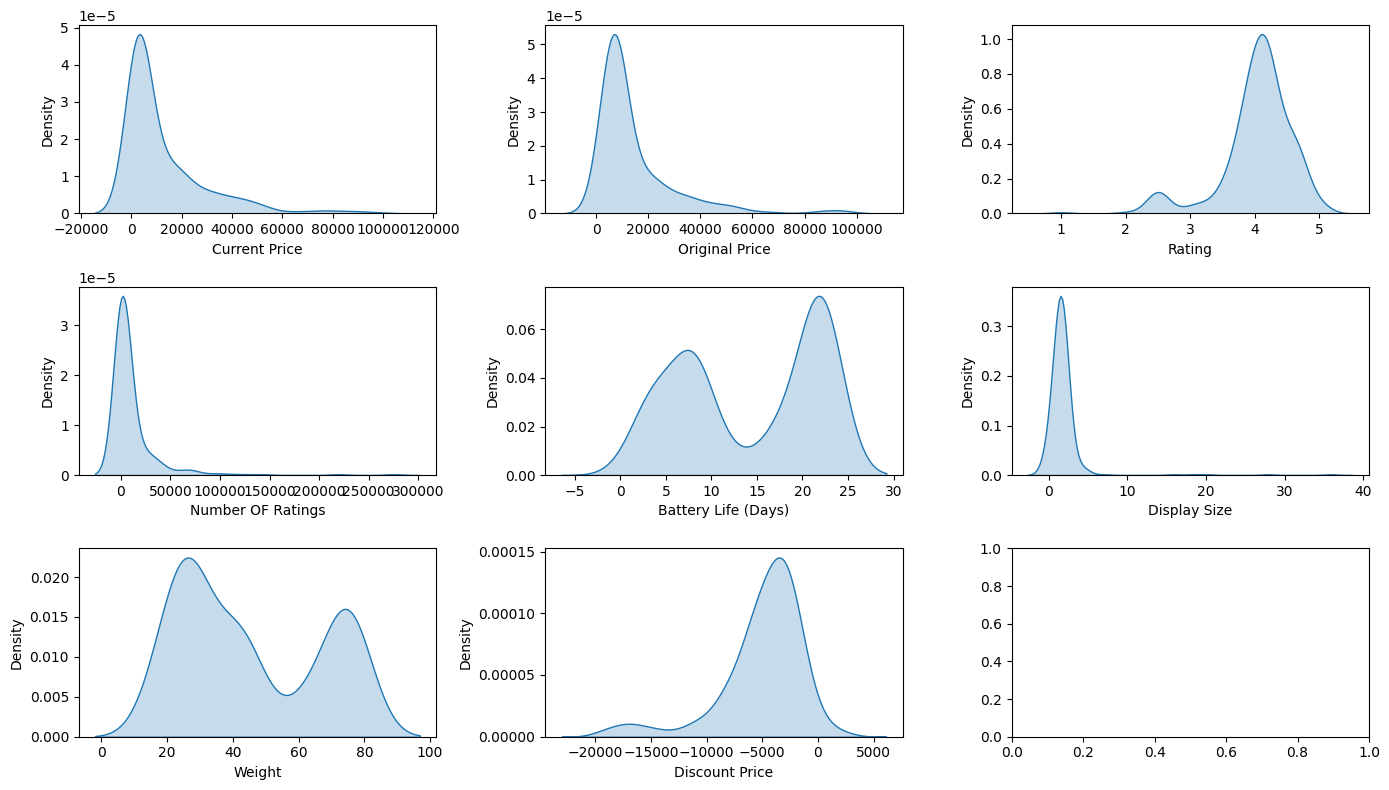

In [31]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(14,8))

for i,colun in enumerate(numerical_col):
    row = i//3
    col = i%3 
    ax = axes[row,col]
    sns.kdeplot(data=train_df[colun],ax = ax ,fill=True)

fig.tight_layout()
plt.show()

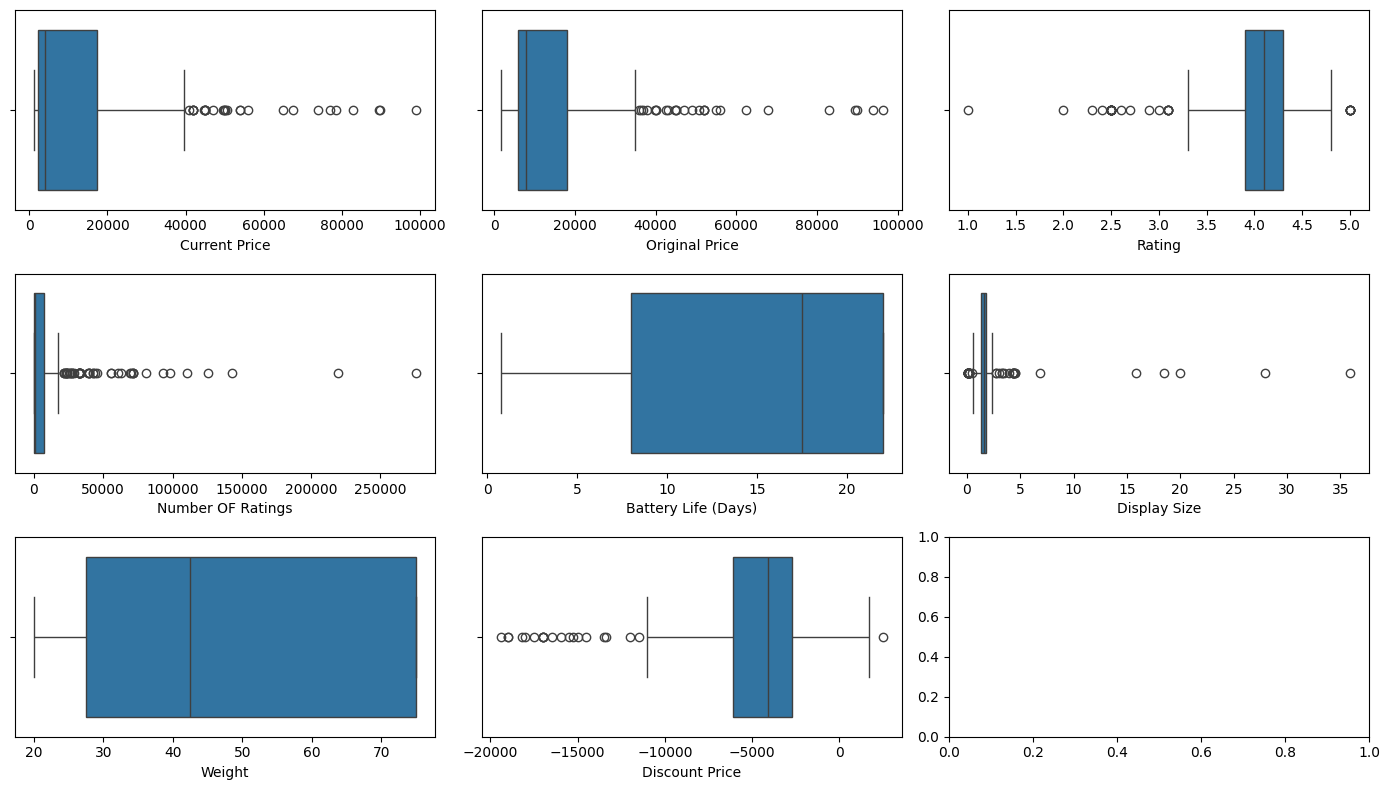

In [32]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(14,8))

for i,colun in enumerate(numerical_col):
    row = i//3
    col = i%3 
    ax = axes[row,col]
    sns.boxplot(x=train_df[colun],ax = ax)

fig.tight_layout()
plt.show()

In [33]:
train_df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [34]:
def remove_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return data[ (data[col]> lower_bound) & (data[col]< upper_bound)]

In [35]:
import_col = ['Current Price', 'Original Price', 'Rating','Number OF Ratings','Display Size']

In [36]:
for col in import_col:
    train_df = remove_outliers_IQR(train_df,col)

In [37]:
for col in numerical_col:
    print(col)
    train_df[col].fillna(train_df[col].median(),inplace=True)

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


C:\Users\acer\AppData\Local\Temp\ipykernel_2772\1081207404.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(),inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_2772\1081207404.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [38]:
train_df[numerical_col].isnull().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
Discount Price         0
dtype: int64

In [39]:
train_df.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             56
Strap Color            56
Strap Material         23
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [40]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
2,2499.0,11999.0,4.1,1990.0,8.0,1.9,75.0,-9500.0
5,2499.0,6999.0,4.3,3944.0,22.0,1.9,42.5,-4500.0
6,3499.0,5999.0,4.2,1785.0,22.0,1.8,75.0,-2500.0
12,2126.0,5999.0,3.7,18.0,8.0,1.9,27.5,-3873.0
19,11499.0,18999.0,3.9,406.0,12.5,1.4,42.5,-7500.0


In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
data = scaler.fit_transform(train_df[numerical_col[:-1]]) 

In [44]:
data

array([[0.06565657, 0.4683556 , 0.66666667, ..., 0.34117647, 0.66666667,
        1.        ],
       [0.06565657, 0.23720586, 0.83333333, ..., 1.        , 0.66666667,
        0.40909091],
       [0.11616162, 0.19097591, 0.75      , ..., 1.        , 0.58333333,
        1.        ],
       ...,
       [0.09090909, 0.19097591, 0.83333333, ..., 1.        , 0.5       ,
        0.40909091],
       [0.05050505, 0.        , 0.66666667, ..., 0.12941176, 0.33333333,
        0.        ],
       [0.53030303, 0.60704544, 0.83333333, ..., 0.12941176, 0.16666667,
        0.13636364]])

In [45]:
data = pd.DataFrame(data, columns=numerical_col[:-1])

In [46]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.065657,0.468356,0.666667,0.059470,0.341176,0.666667,1.000000
1,0.065657,0.237206,0.833333,0.117952,1.000000,0.666667,0.409091
2,0.116162,0.190976,0.750000,0.053334,1.000000,0.583333,1.000000
3,0.046818,0.190976,0.333333,0.000449,0.341176,0.666667,0.136364
4,0.520202,0.791965,0.500000,0.012062,0.552941,0.250000,0.409091


In [47]:
data.shape , train_df.shape

((143, 7), (143, 15))

In [48]:
train_df.drop(numerical_col[:-1],axis=1,inplace=True)

In [49]:
train_df.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price
2,fire-boltt,BSW070,NaN,NaN,NaN,Yes,Yes,-9500.0
5,noise,"ColorFit Loop Advanced BT Calling with 1.85"" d...",Square,Grey,Silicon,Yes,Yes,-4500.0
6,dizo,Watch D Talk 1.8 display with calling&7 day ba...,Rectangle,Grey,Silicon,Yes,Yes,-2500.0
12,dizo,NaN,NaN,NaN,NaN,Yes,Yes,-3873.0
19,honor,MUS-B19,NaN,NaN,NaN,Yes,Yes,-7500.0


In [50]:
train_df = pd.concat([train_df,data], axis=1)

In [51]:
train_df.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
2,fire-boltt,BSW070,NaN,NaN,NaN,Yes,Yes,-9500.0,0.116162,0.190976,0.750000,0.053334,1.000000,0.583333,1.000000
5,noise,"ColorFit Loop Advanced BT Calling with 1.85"" d...",Square,Grey,Silicon,Yes,Yes,-4500.0,0.005051,0.375896,0.750000,0.771609,0.341176,0.500000,0.409091
6,dizo,Watch D Talk 1.8 display with calling&7 day ba...,Rectangle,Grey,Silicon,Yes,Yes,-2500.0,0.065657,0.375896,0.750000,0.697324,0.129412,0.583333,0.772727
12,dizo,NaN,NaN,NaN,NaN,Yes,Yes,-3873.0,0.166667,0.260321,0.333333,0.000000,1.000000,0.500000,0.409091
19,honor,MUS-B19,NaN,NaN,NaN,Yes,Yes,-7500.0,0.106061,0.190976,0.583333,0.002963,0.552941,0.166667,1.000000


In [52]:
train_df.shape

(223, 15)

## Categorical Columns